# Anscombe's Quartet, aka The Troll Dataset

## Why You Should Always Plot Your Data Before Jumping to Conclusions

Have you ever wondered what statisticians do for fun?  You might think that they would enjoy going to casinos and ruining people's nights by lecturing them about how they're betting against the odds.  Or perhaps you can picture one spending an entire day flipping a coin to hypothesis test whether it's fair or biased.

But you'd be wrong.  In reality, when a statistician is looking for a bit of mild amusement, they spend time *finding creative ways to troll people.*  Check out a prime example below.

In [1]:
# Import modules for data manipulation, maths, and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set style of plotting area
import matplotlib.style as style
style.use('seaborn')

In [2]:
anscombe = pd.read_csv("anscombes.csv")

anscombe.columns = anscombe.columns.str.split('_', expand=True)
anscombe.columns = anscombe.columns.swaplevel(1,0)

anscombe

I         II       III         IV       
     x      y   x     y   x      y   x      y
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

This is a dataset created by statistician Francis Anscome in 1973.  What we have here is four datasets (labelled I, II, III and IV because Roman numerals are cool) each consisting of 11 pairs of x and y coordinates.  

*(What quantities the coordinates actually represent isn't particularly important for that sake of this discussion.  You can make your own if you want.  x could be number of scoops of ice cream in a given sundae and y could be the number of seconds it took me to eat the entire thing.  Yum.)*

Because the human brain is rubbish at gleaning information from tabular data—even for this pathetically small dataset—let's plot out each of the four datasets and compare them.

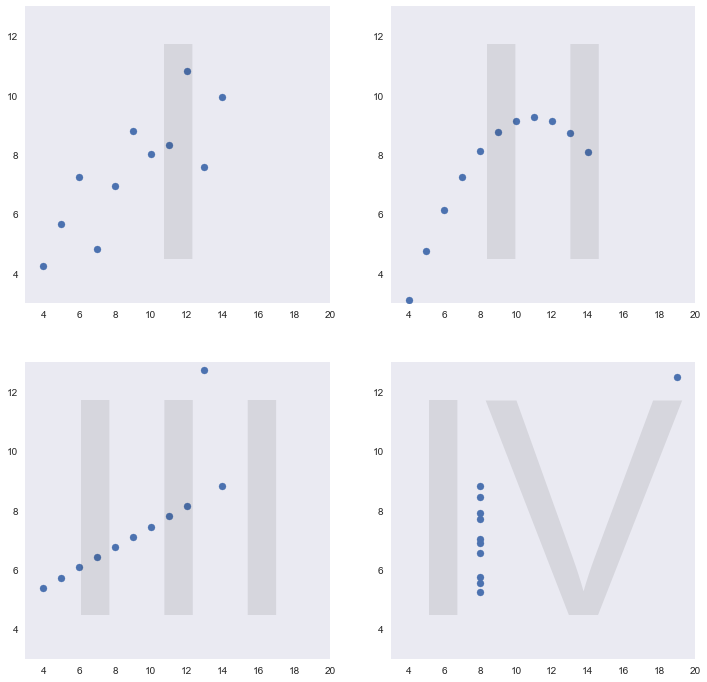

In [9]:
def plot_data(trendlines=False):

    # Set up plotting area - we're going to have four plots in a 2 by 2 grid
    fig = plt.figure(figsize=(12,12))


    # --- FIRST PLOT ---

    # Add top left subplot within plotting area
    ax1 = fig.add_subplot(221)

    # Plot data
    ax1.scatter(anscombe["I"]["x"], anscombe["I"]["y"])

    # Add text
    ax1.text(x=11.5, y = 4.5, s = "I",
                fontsize = 300, alpha = .10, ha="center")

    # Set x-axis limits
    ax1.set_xlim(3,20)

    # Set y-axis limits
    ax1.set_ylim(3,13)

    # Remove gridlines
    ax1.grid(False)


    # --- SECOND PLOT ---

    # Add top right subplot within plotting area
    ax2 = fig.add_subplot(222)

    # Plot data
    ax2.scatter(anscombe["II"]["x"], anscombe["II"]["y"])

    # Add text
    ax2.text(x=11.5, y = 4.5, s = "II",
                fontsize = 300, alpha = .10, ha="center")

    # Set x-axis limits
    ax2.set_xlim(3,20)

    # Set y-axis limits
    ax2.set_ylim(3,13)

    # Remove gridlines
    ax2.grid(False)


    # --- THIRD PLOT ---

    # Add bottom left subplot within plotting area
    ax3 = fig.add_subplot(223)

    # Plot data
    ax3.scatter(anscombe["III"]["x"], anscombe["III"]["y"])

    # Add text
    ax3.text(x=11.5, y = 4.5, s = "III",
                fontsize = 300, alpha = .10, ha="center")

    # Set x-axis limits
    ax3.set_xlim(3,20)

    # Set y-axis limits
    ax3.set_ylim(3,13)

    # Remove gridlines
    ax3.grid(False)


    # --- FOURTH PLOT ---

    # Add bottom left subplot within plotting area
    ax4 = fig.add_subplot(224)

    # Plot data
    ax4.scatter(anscombe["IV"]["x"], anscombe["IV"]["y"])

    # Add text
    ax4.text(x=11.5, y = 4.5, s = "IV",
            fontsize = 300, alpha = .10, ha="center")

    # Set x-axis limits
    ax4.set_xlim(3,20)

    # Set y-axis limits
    ax4.set_ylim(3,13)

    # Remove gridlines
    ax4.grid(False)
    
    
    # Code for plotting trendlines, if desired
    if trendlines == True:
        
        # I miss using R
        def abline(slope, intercept):
            """Plot a line from slope and intercept"""
            axes = plt.gca()
            x_vals = np.array(ax1.get_xlim())
            y_vals = intercept + slope * x_vals
            plt.plot(x_vals, y_vals, '--')
        
        # Loop through each dataset/plot, adding and labelling the trendline
        axs = [ax1, ax2, ax3, ax4]

        for i in range(0,4):
            ax = axs[i]
            z = zs[i]
    
            x_vals = np.array(ax.get_xlim())
            y_vals = z[1] + z[0] * x_vals
            ax.plot(x_vals, y_vals, '--')
            ax.text(x=10, y=4, s='y = {0:.2f}x + {1:.2f}'.format(z[0],z[1]), fontsize=20, alpha=0.75)

# Create plots without trendline
plot_data()

plt.savefig("anscombe_plotted")

*(For ease of comparison, each of the four datasets has been plotted on x- and y-axes of the same scale.*)

You may be wondering where I'm going with this.  These four datasets seem to have very little in common—they all show wildly different trends and you'd have to be a fool to get them mixed up with one another.

Well, let's see what happens when we call on our old friend linear regression.

In [4]:
# Calculate gradient and intercept of lines of best fit

zs = []

for num in ["I", "II", "III", "IV"]:
    z = np.polyfit(x=anscombe[num]["x"], y=anscombe[num]["y"], deg=1)
    zs.append(z)

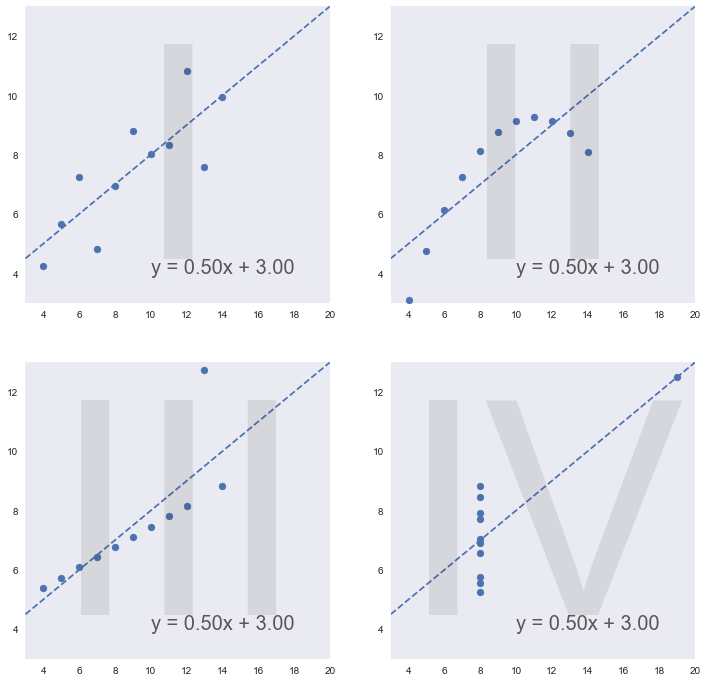

In [10]:
# Same code as before, but this time let's add the trendlines
plot_data(trendlines=True)

plt.savefig("anscombe_plotted_trendlines")

Uh oh... it's the same line of best fit for all of them!  How has that happened?

Maybe we can spot a difference in the correlations between x and y for each set of data.

In [7]:
print("Correlation coefficient for:\n")

print("Dataset I: " + str(anscombe["I"]["x"].corr(anscombe["I"]["y"])))
print("Dataset II: " + str(anscombe["II"]["x"].corr(anscombe["II"]["y"])))
print("Dataset III: " + str(anscombe["III"]["x"].corr(anscombe["III"]["y"])))
print("Dataset IV: " + str(anscombe["IV"]["x"].corr(anscombe["IV"]["y"])))

Correlation coefficient for:

Dataset I: 0.81642051634484
Dataset II: 0.8162365060002428
Dataset III: 0.8162867394895982
Dataset IV: 0.8165214368885031


Now we're really in trouble... the correlation coefficients are all basically the same too!  Is there any way we can distinguish these datasets from their summary statistics?

In [8]:
print("(Mean of x values, mean of y values) for:\n")

print("Dataset I: (" + str(round(anscombe["I"]["x"].mean(),2)) + ", " + str(round(anscombe["I"]["y"].mean(),2)) + ")")
print("Dataset II: (" + str(round(anscombe["II"]["x"].mean(),2)) + ", " + str(round(anscombe["II"]["y"].mean(),2)) + ")")
print("Dataset III: (" + str(round(anscombe["III"]["x"].mean(),2)) + ", " + str(round(anscombe["III"]["y"].mean(),2)) + ")")
print("Dataset IV: (" + str(round(anscombe["IV"]["x"].mean(),2)) + ", " + str(round(anscombe["IV"]["y"].mean(),2)) + ")")

print("\n\n(Variance of x values, variance of y values) for:\n")

print("Dataset I: (" + str(round(anscombe["I"]["x"].var(),2)) + ", " + str(round(anscombe["I"]["y"].var(),2)) + ")")
print("Dataset II: (" + str(round(anscombe["II"]["x"].var(),2)) + ", " + str(round(anscombe["II"]["y"].var(),2)) + ")")
print("Dataset III: (" + str(round(anscombe["III"]["x"].var(),2)) + ", " + str(round(anscombe["III"]["y"].var(),2)) + ")")
print("Dataset IV: (" + str(round(anscombe["IV"]["x"].var(),2)) + ", " + str(round(anscombe["IV"]["y"].var(),2)) + ")")

(Mean of x values, mean of y values) for:

Dataset I: (9.0, 7.5)
Dataset II: (9.0, 7.5)
Dataset III: (9.0, 7.5)
Dataset IV: (9.0, 7.5)


(Variance of x values, variance of y values) for:

Dataset I: (11.0, 4.13)
Dataset II: (11.0, 4.13)
Dataset III: (11.0, 4.12)
Dataset IV: (11.0, 4.12)


What a nightmare!  The majority of the simple, straightforward summary statistics that you might want to use to describe each of these datasets are the same for all four—*despite us having seen that the shape and pattern of the data are wildly different.*

You might wonder what manner of terrible thing could have happened if we didn't bother plotting out our data beforehand.  We may well have seen the identical summary statistics and assumed that all four datasets had the same distribution.  Our conclusion — and any actions taken as a result—would have been way off the mark.

So consider this a cautionary tale—while summary statistics are certainly useful and can provide us with more precise information than we can gather from just eyeing up a graph, their simplistic nature can also deceive.  *In your exploratory data analysis, never skip over visualising your data:* plotting, re-plotting, and plotting again in different ways to try and expose new patterns.  

Because as we've seen, the cold, hard numbers may be lying to you.

## Credits and more info

__Andrew Hetherington__ is an actuary-in-training and data enthusiast based in London, UK. 

- Check out my [website](https://www.andrewhetherington.com/).  

- Connect with me on [LinkedIn](https://www.linkedin.com/in/andrewmhetherington/).  

- Follow me on [Medium](https://medium.com/@andrew.m.hetherington/). 

- See what I’m tinkering with on [GitHub](https://github.com/andrewhetherington/python-projects).  

*Dataset: Anscombe, F. J. (1973). "Graphs in Statistical Analysis". American Statistician. 27 (1): 17–21. doi:10.1080/00031305.1973.10478966. JSTOR 2682899.*